# Analise Exploratória de Conjunto de dados para Psoríase

In [ ]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Download do Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendrababu9666/psoriasis-data-set")

100%|██████████| 355M/355M [00:02<00:00, 137MB/s]

Extracting files...


In [ ]:
# Verificando classes do dataset
nomes_de_classes = os.listdir(path)
print(f'classes: {nomes_de_classes}')

caminho_para_classes = [os.path.join(path, classe) for classe in nomes_de_classes]
print(f"caminho para classes {caminho_para_classes}")

classe_NORMAL_SKIN = caminho_para_classes[0]
classe_PSORIASIS   = caminho_para_classes[1]

classes: ['NORMAL_SKIN', 'PSORIASIS']
caminho para classes ['/root/.cache/kagglehub/datasets/devendrababu9666/psoriasis-data-set/versions/1/NORMAL_SKIN', '/root/.cache/kagglehub/datasets/devendrababu9666/psoriasis-data-set/versions/1/PSORIASIS']


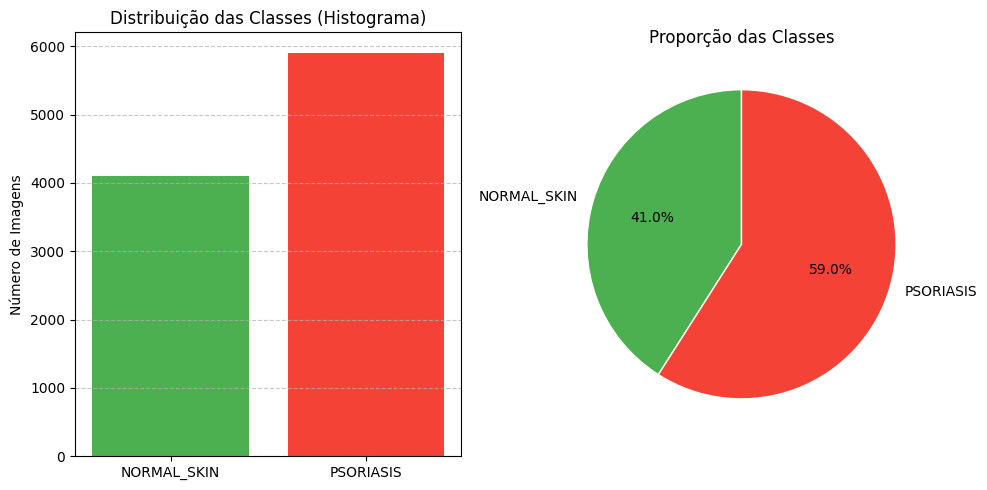

In [ ]:
# Verificando o balanceamento das classes
NORMAL_SKIN_contagem = len(os.listdir(classe_NORMAL_SKIN))
PSORIASIS_contagem   = len(os.listdir(classe_PSORIASIS))

# Calculando proporções
total_instancias = NORMAL_SKIN_contagem + PSORIASIS_contagem
NORMAL_SKIN_proporcao = NORMAL_SKIN_contagem / total_instancias
PSORIASIS_proporcao   = PSORIASIS_contagem / total_instancias

# Dados para visualização
contagens = [NORMAL_SKIN_contagem, PSORIASIS_contagem]
proporcoes = [NORMAL_SKIN_proporcao, PSORIASIS_proporcao]

# Criando subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Subplot 1: Histograma (barras)
axs[0].bar(nomes_de_classes, contagens, color=['#4CAF50', '#F44336'])
axs[0].set_title('Distribuição das Classes (Histograma)')
axs[0].set_ylabel('Número de Imagens')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Gráfico de Pizza
axs[1].pie(
    proporcoes,
    labels=nomes_de_classes,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336'],
    wedgeprops={'edgecolor': 'white'}
)
axs[1].set_title('Proporção das Classes')

plt.tight_layout()
plt.show()

O dataset demonstra um leve desbalanceamento tendendo para classe Psoriasis.

Tendo 18% a mais instâncias de imagens com Psoriasis do que com pele normal.

In [ ]:
# Função para coletar shapes de todas as imagens de um diretório
def coletar_shapes(diretorio):
    shapes = []
    for arquivo in os.listdir(diretorio):
        caminho = os.path.join(diretorio, arquivo)
        if os.path.isfile(caminho):
            try:
                with Image.open(caminho) as img:
                    shapes.append(np.array(img).shape)
            except Exception as e:
                print(f"Erro ao carregar {arquivo}: {e}")
    return shapes

# Coletando shapes das duas classes
shapes_normal = coletar_shapes(classe_NORMAL_SKIN)
shapes_psoriasis = coletar_shapes(classe_PSORIASIS)

# Combinando todas as dimensões
todos_shapes = shapes_normal + shapes_psoriasis

# Converter cada shape (array) em tupla
todos_shapes_tuplas = [tuple(shape) for shape in todos_shapes]

# Verificando se todas as imagens têm o mesmo tamanho
unicos_shapes = list(set(todos_shapes_tuplas))

print(f"Total de imagens analisadas: {len(todos_shapes_tuplas)}")
print(f"Total de shapes únicos encontrados: {len(unicos_shapes)}")

# Exibir exemplos de shapes únicos
for i, shape in enumerate(unicos_shapes[:10]):  # mostra até 10
    print(f"{i+1:02d}: {shape}")

if len(unicos_shapes) == 1:
    print(f"Todas as imagens possuem o mesmo shape: {unicos_shapes[0]}")
else:
    print(f"Existem {len(unicos_shapes)} tamanhos diferentes de imagens no dataset.")


Total de imagens analisadas: 10007
Total de shapes únicos encontrados: 1145
01: (178, 1088, 3)
02: (133, 420, 3)
03: (733, 366, 3)
04: (368, 481, 3)
05: (800, 722, 3)
06: (292, 202, 3)
07: (254, 255, 3)
08: (228, 165, 3)
09: (457, 457, 3)
10: (1080, 575, 3)
⚠️ Existem 1145 tamanhos diferentes de imagens no dataset.


Será necessário utilizar uma padronização para todos as imagens durante um passo de pré processamento de dados. ex: (224, 224, 3)

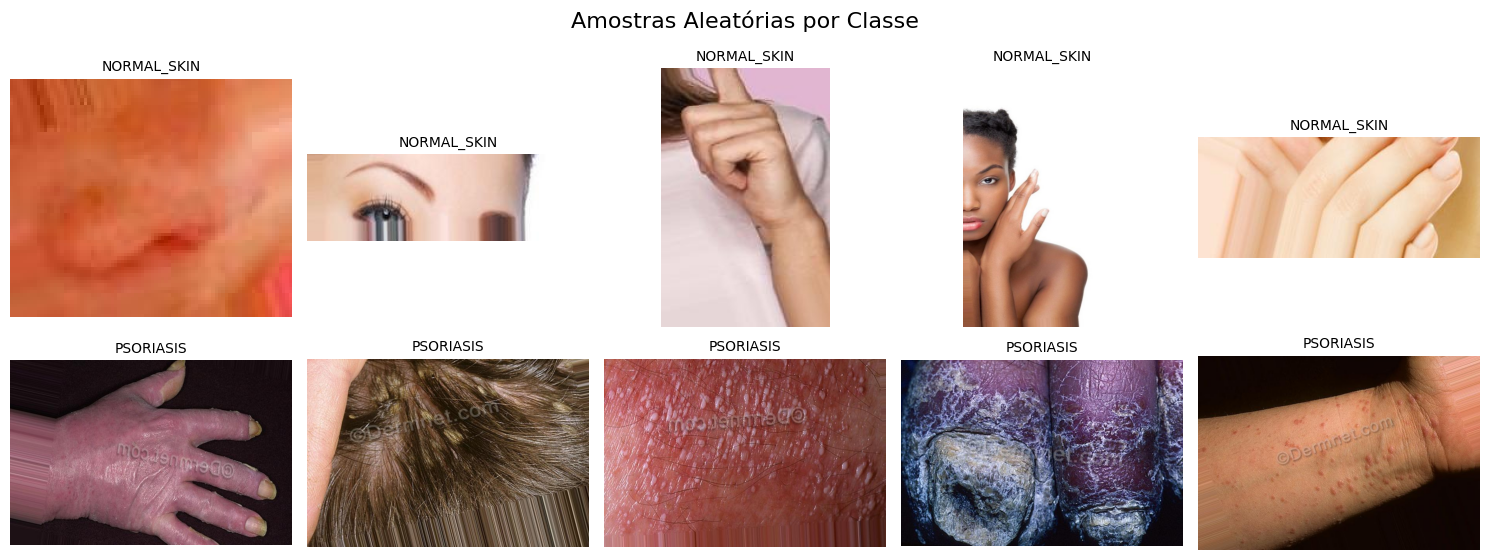

In [ ]:
# Exibindo algumas amostras aleatórias de dentro do dataset

# Selecionar 5 imagens aleatórias por classe
def amostrar_imagens(diretorio, n=5):
    arquivos = [os.path.join(diretorio, f) for f in os.listdir(diretorio) if os.path.isfile(os.path.join(diretorio, f))]
    return random.sample(arquivos, min(n, len(arquivos)))  # garante que não falhe se tiver menos de n imagens

# Coleta das amostras
amostras_normal = amostrar_imagens(classe_NORMAL_SKIN, n=5)
amostras_psoriasis = amostrar_imagens(classe_PSORIASIS, n=5)

# Exibição das amostras
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Amostras Aleatórias por Classe", fontsize=16)

# Linha 1: NORMAL_SKIN
for i, caminho in enumerate(amostras_normal):
    img = Image.open(caminho)
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title("NORMAL_SKIN", fontsize=10)

# Linha 2: PSORIASIS
for i, caminho in enumerate(amostras_psoriasis):
    img = Image.open(caminho)
    axs[1, i].imshow(img)
    axs[1, i].axis('off')
    axs[1, i].set_title("PSORIASIS", fontsize=10)

plt.tight_layout()
plt.show()